# Elementos conformantes

Todos los elementos que hacen una red neuronal

## 1. Neurona

## 2. Capa

Conjunto de neuronas

## 3. Capa oculta

Son las capas de neuronas que estan internamente dentro de una red neuronal.

## 4. Sesgo y Pesos!

Hay sesgos y pesos en cada neurona, que multiplican al input!. La funcion del sesgo y el peso responde a la forma de:

y = mx + n

Donde m es el sesgo, y n es el peso.

Por lo tanto, antes de pasar los datos a la funcion de activacion, los datos son transformados con el peso y el sesgo!. Esto finalmente cambia la forma de la funcion de activacion!

- El sesgo (m) modifica la curvatura de la funcion que tiene cada neurona!
- El peso (n) modifica desde donde parte la funcion que tiene cada neurona!

Al final es como cuando se modifica una funcion con la pendiente y el n. Pendiente modifica la inclinacion de la funcion, mientras que n en donde parte.

## 5. Funciones de Activacion

- Lineal: Una de las variantes de esta funcion es la funcion identidad!
- Sigmoide
- Tangente
- RELU (Funcion Lineal Unitaria Rectificada): Si es negativo, entonces 0, si es sobre 0, entonces es
el mismo valor!. Permite capturar solamente 
- Softmax: Permite resolver el problema de clasificacion de varias clases. Hace que todas las clases
sumen 1!

## 6. Capa de Salida

Es la capa de salida. Es una neurona que recolecta diversos inputs, y genera el ultimo output!

# Entrenamiento y optimizacion

- Optimizador: De Gradiente Estocastico
- Epocas o iteraciones: Indica cuantas veces queremos iterar para optimizar nuestros parametros en
la red neuronal

# Flujo de una red neronal

1. Recibe los datos
2. Se calculan los valores para cada neurona en cada capa
3. Y se propaga!

En el diagrama se entiende super bien la verdad jejejej

O sea:

1. Obtener la suma ponderada a nivel de cada capa (O sea, cada dato por el peso de la capa (o la pendinete))
2. Agregar el sesgo a la suma ponderada
3. El resultado evaluarlo en la funcion de activacion!
4. El resultado de la capa/neurona es el resultado de la suma ponderada en la funcion de activacion! :D Super nice jejejej

# Primera gran decision

- Notemos que la capa de entrada y de salida es siempre la misma. La capa de entrada es la cantidad
de atributos de nuestros datos de entrenamiento. La capa de salida corresponde a nuestro vector
objetivo, o la cantidad de clases a predecir!

- Sin embargo, para las capas ocultas? Cuantas neuronas ocupar? Cuantas capas?

- Para la cantidad de neuronas por capa:
    - Ocupar el promedio de atributos entre la capa de entrada y la de salida
    - Ocupar 2/3 de neuronas en una capa?

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD


Recordar harto mini batch! Porque es el mejor tipo de stochastic gradient descent

In [4]:
model = Sequential()
model.add(
    Dense(units=10, input_dim=5, activation="relu", name="hidden1")
)  # Si nuestros datos tienen
# 5 variables, entonces se pone un input dim de 5!
model.add(Dense(units=10, activation="relu", name="hidden2")) # Con units se declaran que se utilizaran 10 neuronas por cada
model.add(Dense(units=1, activation="sigmoid", name="output"))
model.compile(optimizer=SGD(learning_rate=1), loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X, y, epochs=50, batch_size=100, verbose=0)

In [1]:
import pandas as pd
import numpy as np
import polars as pl

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
sns.set_style()
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

X, y = make_moons(n_samples=500, random_state=11238, noise=0.15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11238)

In [3]:
def crear_red_neuronal(X_train, y_train, n_neurons=10):
    tmp_model = Sequential()
    tmp_model.add(
    Dense(n_neurons,
          input_dim= X_train.shape[1],
          kernel_initializer='glorot_normal'),
          activation='relu',
          name='hidden1'
)

    tmp_model.add(
    Dense(
    1,
    kernel_initializer='glorot_normal',
    activation='sigmoid',
    name='output'
    )
)

    tmp_model.compile(
    optimizer=SGD(learning_rate=1),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

    tmp_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=100,
    verbose=0
)

    diccionario = tmp_model.history.history

    return tmp_model, diccionario

- Una mayor cantidad de neuronas NO asegura una mayor precision en los resultados! De hecho, hay
una cantidad optima de neuronas!

- Una mayor cantidad de capas tampoco asegura una mayor precision en los resultados!!!!

# Cantidad de parametros a estimar!

Esto se puede ver con el siguiente diagrama

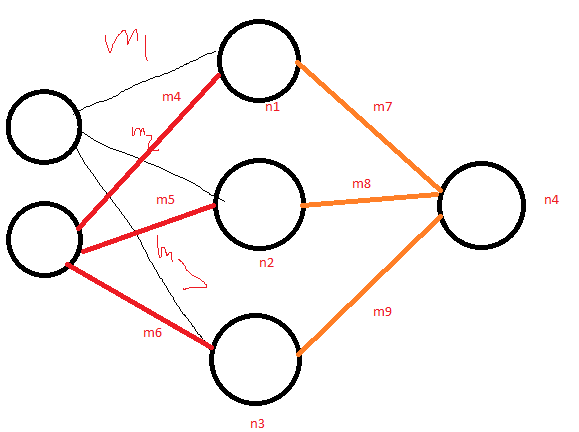

O sea, para la primera capa es:

9 atributos!

- 6 pesos (2 atributos del conjunto de entrenamiento por 3 neuronas de la primera capa!). O sea,
n atributos datos de entrenamiento * n capas
- 3 sesgos (1 por cada neurona de la primera capa). O sea, n neuronas capa

# Teorema de aproximacion Universal

- Basicamente dice que cualquier funcion se puede representar con una red neuronal!. Una red
lo suficientemente profunda siempre podra representar cualquier funcion!
- Esto se puede representar con una cantidad de neuronas N y una cantidad de capas C!

Sin embargo:

- El algoritmo de optimizacion puede fallar en cuanto a la busqueda de parametros
- La funcion puede tender al overfitting!